# Alpha scan

**Plan:** For the track classifer with 4 tracks, find out what $\alpha$ is optimal for training!

In [1]:
import numpy as np
import h5py
import sys
import pandas as pd
import xarray as xr

sys.path.append("..")
from usefulFcts import *
from trainNet import *
from plottingFcts import *

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


### Load in the data

All that's changing in this notebook was the $\alpha$ used for training that balanced the training and testing loss.

In [2]:
dataFile = '../data/mc16d'
vStr = "sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits"
dataTag = "3m_15trks_{}_sd0_rev".format(vStr)

f_name = "{}/data_{}_4trkClasses.hdf5".format(dataFile,dataTag)

f = h5py.File(f_name,"r")
    
X_te = f['X_test'][:]
y_te = f['y_test'][:]
y_trk_te = f['y_trk_test'][:].astype(int)
ix_te = f['ix_test'][:]

f.close()

In [3]:
_, nTrks, nFeatures = X_te.shape

### Scan $\alpha$ for some of these models

First off, let's take a look at what parameters I *have* for this model.

In [4]:
%%bash
ls ../models/mc16d/LSTM_4_trkClass_50units_10dense_3m_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev_alpha*_history.hdf5

../models/mc16d/LSTM_4_trkClass_50units_10dense_3m_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev_alpha0.1_history.hdf5
../models/mc16d/LSTM_4_trkClass_50units_10dense_3m_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev_alpha0.5_history.hdf5
../models/mc16d/LSTM_4_trkClass_50units_10dense_3m_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev_alpha0.8_history.hdf5
../models/mc16d/LSTM_4_trkClass_50units_10dense_3m_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev_alpha1.0_history.hdf5
../models/mc16d/LSTM_4_trkClass_50units_10dense_3m_15trks_sd0_sz0_nNextT

In [5]:
alphas = [0.5, 1.0, 1.5, 2.0]

modelDir = '../models/mc16d/'
nTrkClasses=4

labels = [r'$\alpha$ = {}'.format(a) for a in alphas]

In [6]:
labels

['$\\alpha$ = 0.5', '$\\alpha$ = 1.0', '$\\alpha$ = 1.5', '$\\alpha$ = 2.0']

Initialize method from myModel()
alpha= 0.5
Loading weights for previously trained model
Jet_class_acc
Jet_class_loss
Trk_class_acc
Trk_class_loss
loss
val_Jet_class_acc
val_Jet_class_loss
val_Trk_class_acc
val_Trk_class_loss
val_loss


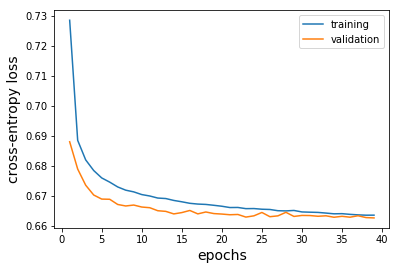

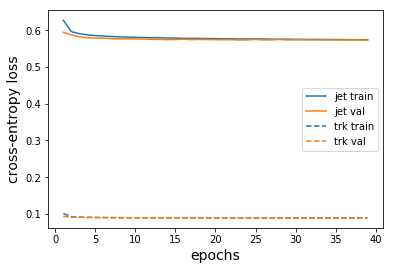

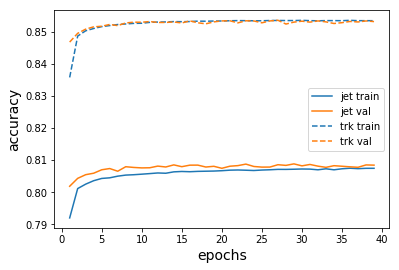

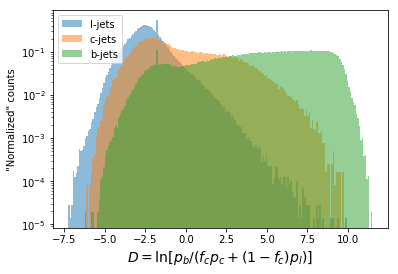

Initialize method from myModel()
alpha= 1.0
Loading weights for previously trained model
Jet_class_acc
Jet_class_loss
Trk_class_acc
Trk_class_loss
loss
val_Jet_class_acc
val_Jet_class_loss
val_Trk_class_acc
val_Trk_class_loss
val_loss


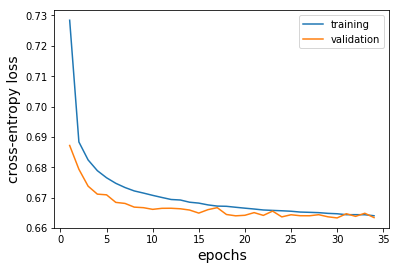

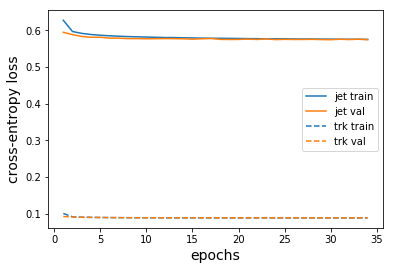

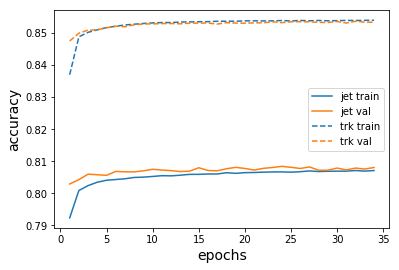

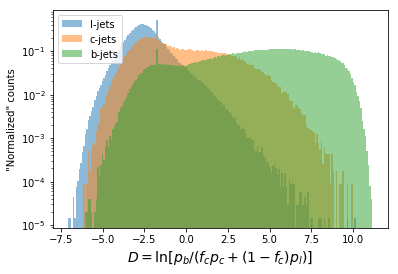

Initialize method from myModel()
alpha= 1.5
Loading weights for previously trained model
Jet_class_acc
Jet_class_loss
Trk_class_acc
Trk_class_loss
loss
val_Jet_class_acc
val_Jet_class_loss
val_Trk_class_acc
val_Trk_class_loss
val_loss


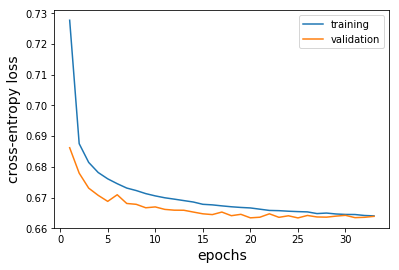

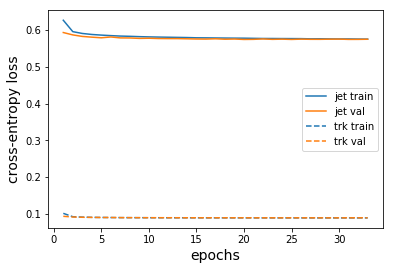

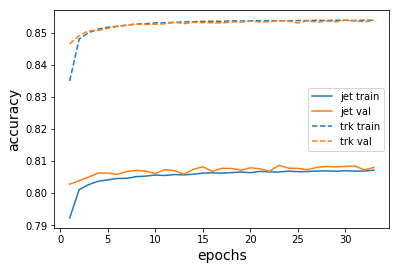

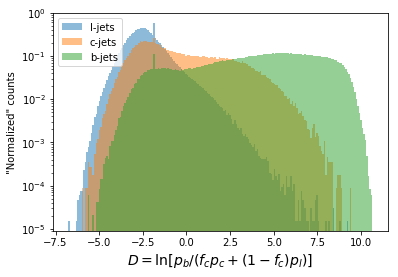

Initialize method from myModel()
alpha= 2.0
Loading weights for previously trained model
Jet_class_acc
Jet_class_loss
Trk_class_acc
Trk_class_loss
loss
val_Jet_class_acc
val_Jet_class_loss
val_Trk_class_acc
val_Trk_class_loss
val_loss


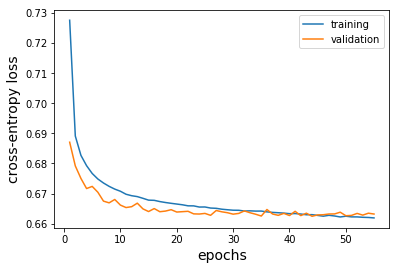

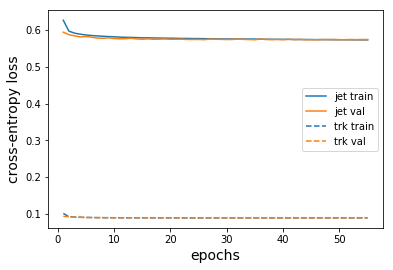

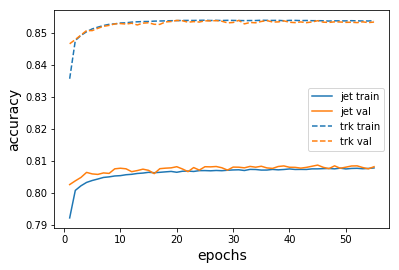

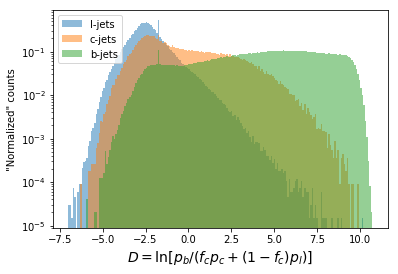

In [7]:
leffs, ceffs, beffs = [], [], []

for alpha in alphas:
    
    m = LSTM_trkClass(modelDir=modelDir,nFeatures=nFeatures, 
                      dataTag=dataTag, nTrkClasses=nTrkClasses,
                      alpha=alpha, loadModel=True)
    
    trainingMetrics(m.modelName)
    
    leff, ceff, beff = sigBkgEff(m, X_te, y_te, ix_te)

    leffs.append(leff)
    ceffs.append(ceff)
    beffs.append(beff)
    

../plottingFcts.py:429: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(teff, np.divide(1,beff), style, color=color, label=label)


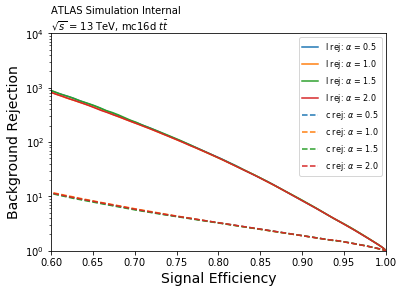

In [8]:
btagROC(beffs, leffs, ceffs, labels, ymax=1e4,legFontSize=8)

There is some slight difference between the $\alpha$s, and it seems like the larger onces are doing slightly better.

I think since there are so many curves, it will be easier to see with the b and c rejections separated out.

../plottingFcts.py:429: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(teff, np.divide(1,beff), style, color=color, label=label)


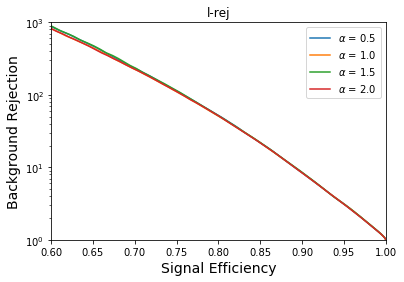

In [21]:
plotROC(beffs,leffs,labels,title='l-rej',tag='lrej_alphaScan_nDenseTrk0')

I actually can't tell if blue or green is doing the best.

../plottingFcts.py:429: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(teff, np.divide(1,beff), style, color=color, label=label)


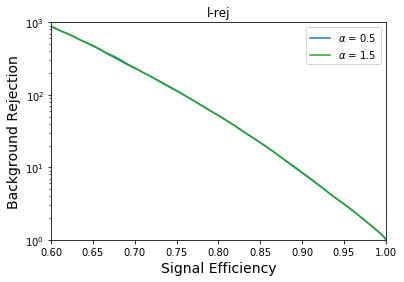

In [17]:
plotROC([beffs[0],beffs[2]],[leffs[0],leffs[2]],[labels[0],labels[2]],title='l-rej',
        colors=['C0','C2'])

In [22]:
plotROC(beffs,ceffs,labels,title='c-rej',styles=['--']*len(beffs),ymax=200,
        tag='crej_alphaScan_nDenseTrk0')

../plottingFcts.py:429: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(teff, np.divide(1,beff), style, color=color, label=label)


I had some other models with and without the dense layer before the track classification, I could try that as well (maybe)?

In [12]:
%%bash
ls ../models/mc16d/LSTM_4_trkClass_50units_10dense_*trkDense_3m_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev_alpha*_history.hdf5

../models/mc16d/LSTM_4_trkClass_50units_10dense_15trkDense_3m_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev_alpha1.0_history.hdf5


Ok, there's only one model with the dense layer before track classification, so at least I can compare the models that were trained with the same $\alpha$.

Initialize method from myModel()
alpha= 1.0
Loading weights for previously trained model
Jet_class_acc
Jet_class_loss
Trk_class_acc
Trk_class_loss
loss
val_Jet_class_acc
val_Jet_class_loss
val_Trk_class_acc
val_Trk_class_loss
val_loss


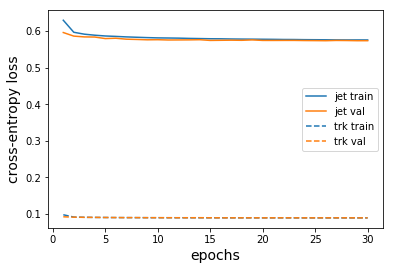

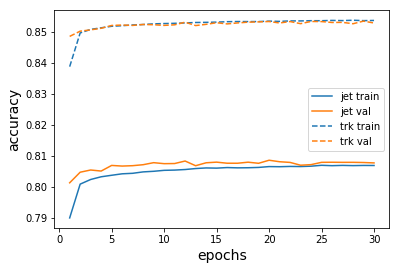

In [13]:
m = LSTM_trkClass(modelDir=modelDir,nFeatures=nFeatures, nDenseTrk=15,
                  dataTag=dataTag, nTrkClasses=nTrkClasses,
                  alpha=1.0, loadModel=True)

trainingMetrics(m.modelName)

leff, ceff, beff = sigBkgEff(m, X_te, y_te, ix_te)

In [19]:
alphas[1]

1.0

In [20]:
btagROC([beffs[1],beff], [leffs[1],leff], [ceffs[1],ceff], 
        ['No dense layer before trk classifier','MLP w/ 15 units before trk classifier'],
        title='$\\alpha$ = 1 with 4 track classes',legFontSize=9,
        tag='alpha1_cf_nDenseTrk15')#, ymax=1e4)

../plottingFcts.py:429: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(teff, np.divide(1,beff), style, color=color, label=label)


But it seems like with this training set size, I'm quite susceptible to overfitting, so maybe I should be playing around w/ dropout a little bit more before concluding that I don't have any gains with this network?